Use decision tree and random forest to train the titanic.csv dataset included in the assignment.

Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and 
others are numerical. If some features are missing, fill them in using the average of the same 
feature of other samples. Take a random 80% samples for training and the rest 20% for test.

In [1]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_recall_curve,confusion_matrix,classification_report



df = pandas.read_csv('titanic.csv')
df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1309 non-null   int64  
 1   pclass      1309 non-null   object 
 2   survived    1309 non-null   int64  
 3   name        1309 non-null   object 
 4   sex         1309 non-null   object 
 5   age         1046 non-null   float64
 6   sibsp       1309 non-null   int64  
 7   parch       1309 non-null   int64  
 8   ticket      1309 non-null   object 
 9   fare        1308 non-null   float64
 10  cabin       295 non-null    object 
 11  embarked    1307 non-null   object 
 12  boat        486 non-null    object 
 13  body        121 non-null    float64
 14  home.dest   745 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [3]:
#df.isnull()

In [4]:
df.describe()

,Unnamed: 0,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.486055,14.413500,1.041658,0.865560,51.758669,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329224,328.000000


In [5]:
ave_age = df.age.mean() #average of  the age column
ave_age

29.881134512434034

In [6]:
ave_fare = df.fare.mean()
ave_fare

33.29547938641433

In [7]:
df.age.fillna(df.age.mean(), inplace = True)
df.fare.fillna(df.fare.mean(), inplace = True)

In [8]:
df['pclass'].replace({'1st':1,'2nd':2,'3rd':3},inplace=True)

In [9]:
df['sex'].replace({'female':0,'male':1},inplace=True)
df['sex'].astype(int)

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: sex, Length: 1309, dtype: int32

In [10]:
train_df, test_df = train_test_split(df,  test_size = 0.2, random_state = 30)


Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and 
dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable 

In [11]:
X = train_df[['pclass', 'sex', 'age', 'sibsp']]
X_test = test_df[['pclass', 'sex', 'age', 'sibsp']]
y = train_df['survived']
y_test = test_df['survived']

In [12]:
X

,pclass,sex,age,sibsp
1225,3,1,60.500000,0
980,3,0,23.000000,0
834,3,1,32.000000,0
275,1,0,40.000000,1
349,2,0,24.000000,0
...,...,...,...,...
919,3,1,18.500000,0
1164,3,1,29.881135,0
500,2,1,46.000000,0
941,3,1,25.000000,0


In [13]:
Ttree = DecisionTreeClassifier() 
Ttree.fit(X, y)

DecisionTreeClassifier()

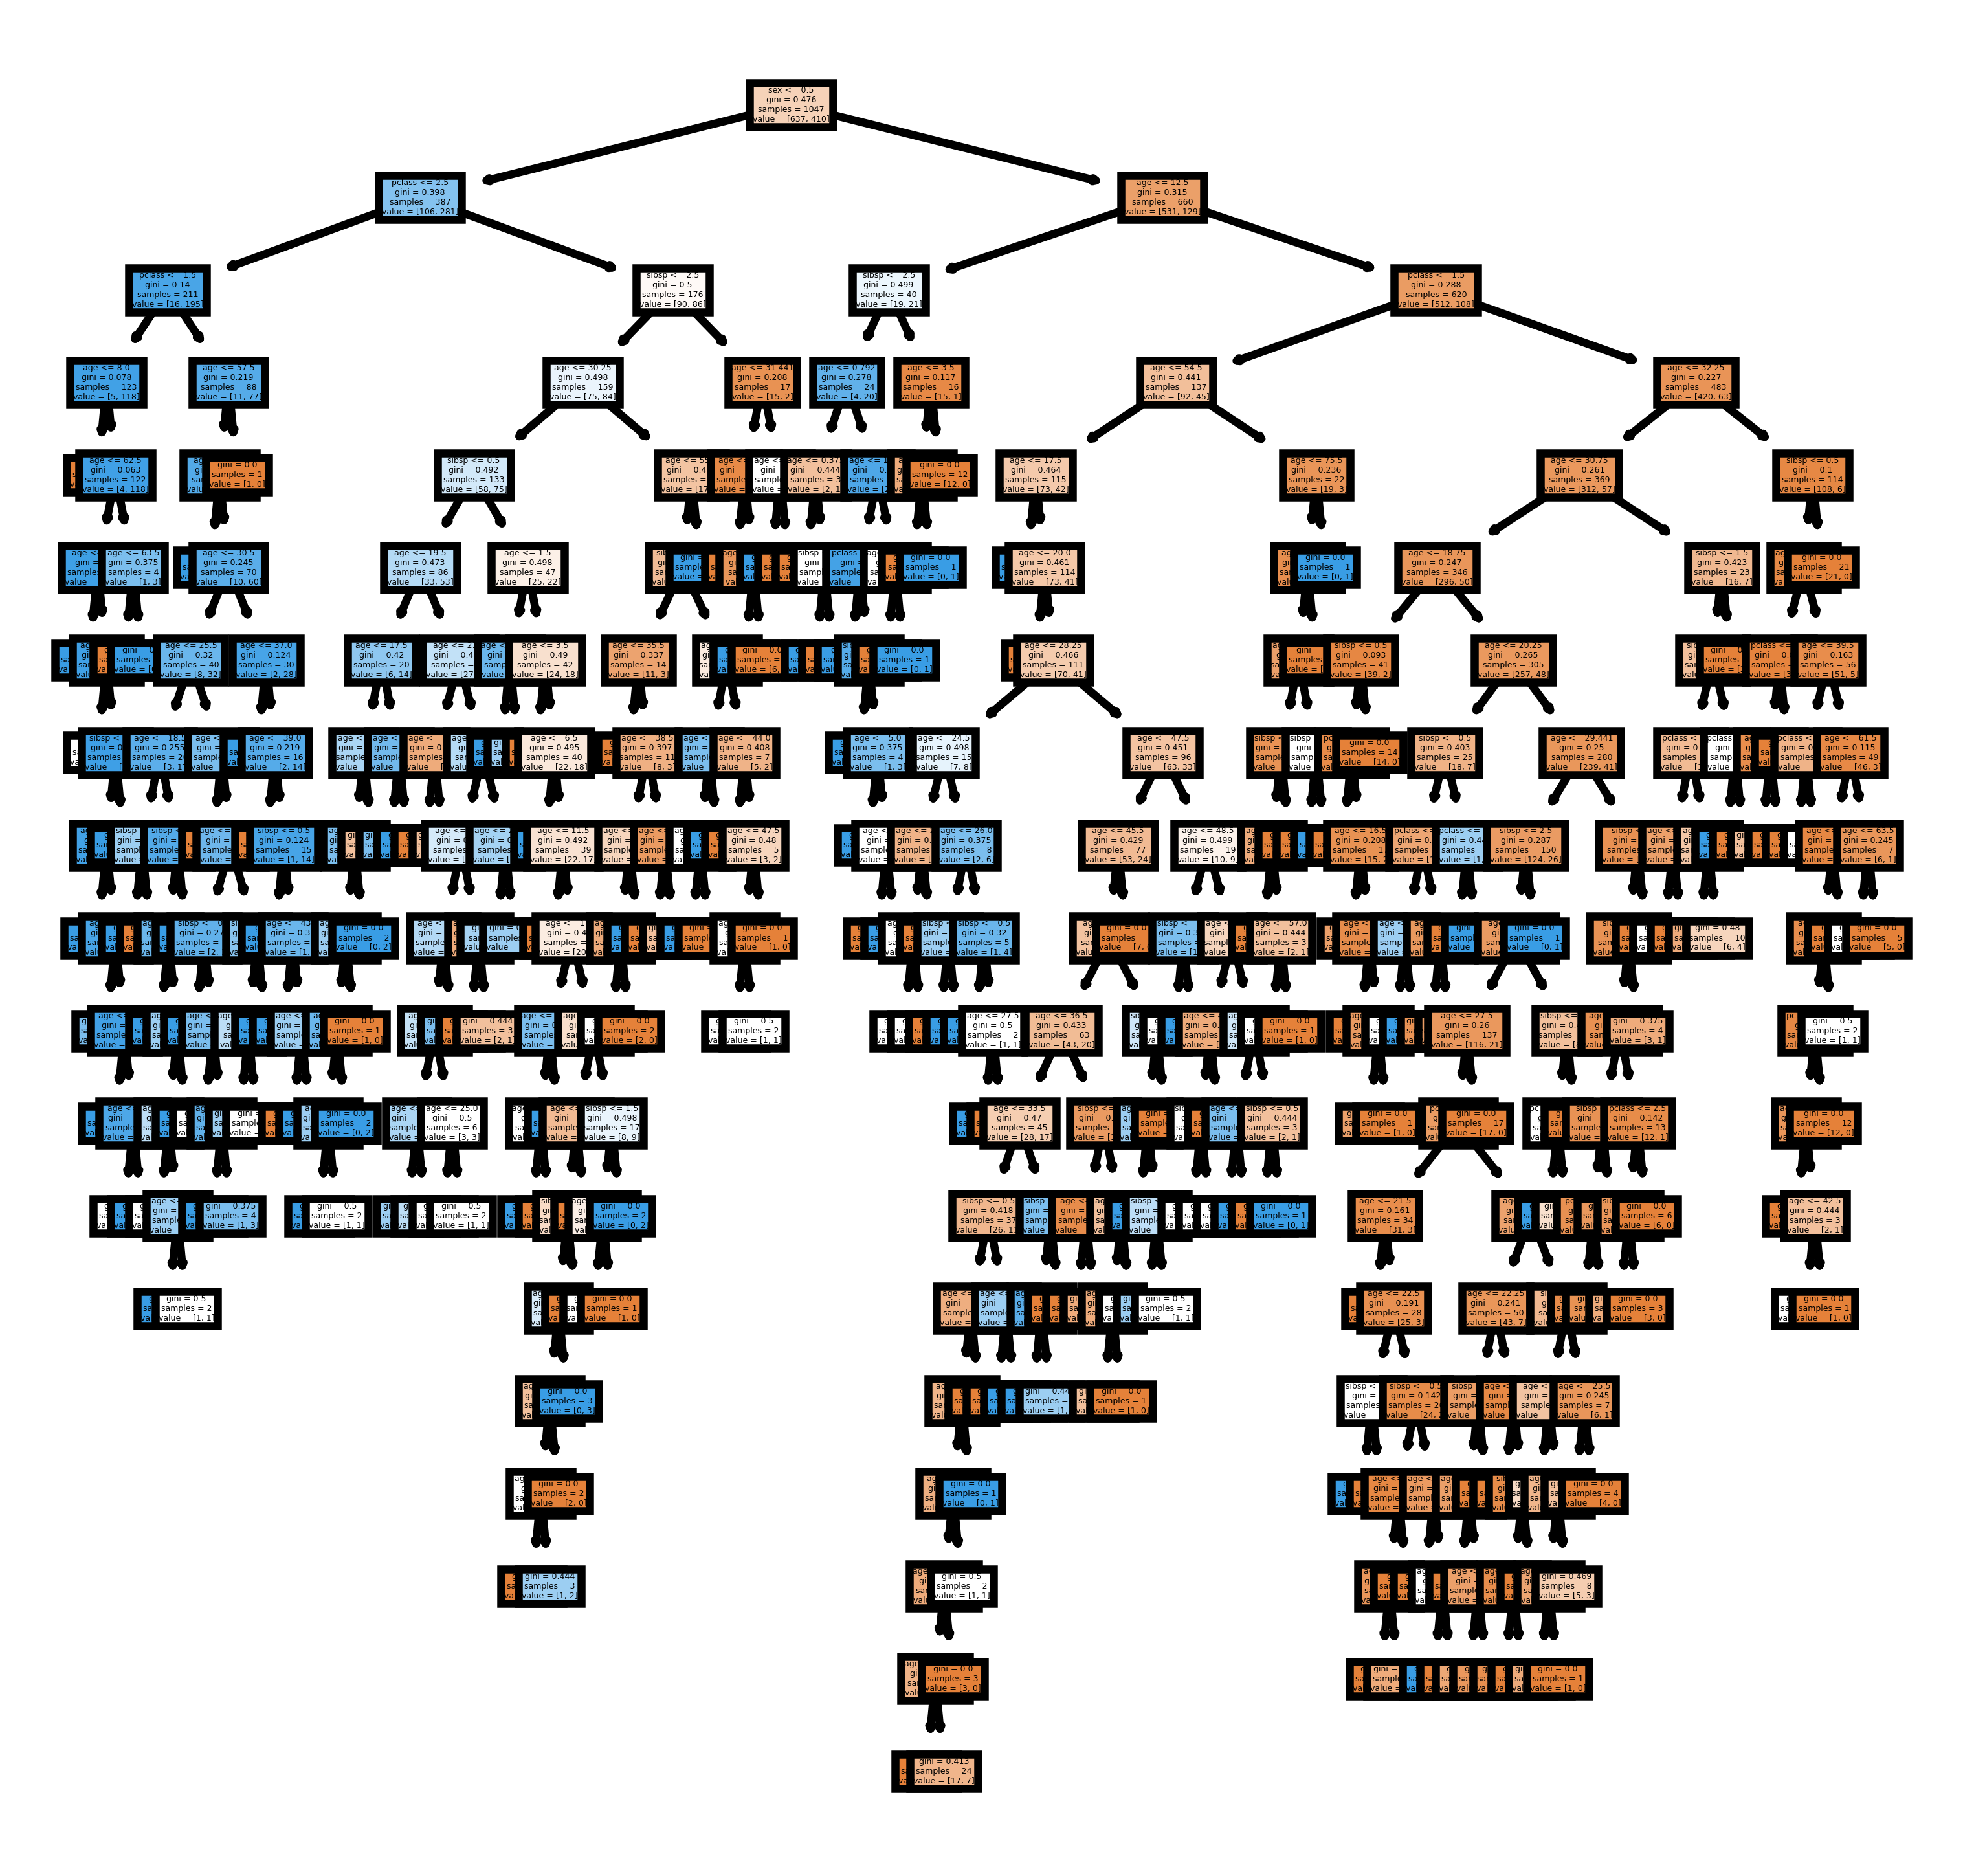

In [14]:
fig, axer = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 900)
plot_tree = tree.plot_tree(Ttree, feature_names = ["pclass","sex","age","sibsp"], filled = True)

Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the 
tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2. 

In [15]:
param_grid = [{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [16]:
titanic_tree_grid_search = DecisionTreeClassifier()
grid_search = GridSearchCV(titanic_tree_grid_search,
                           param_grid,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

In [17]:
grid_search.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [18]:
grid_search.best_params_

{'max_leaf_nodes': 8}

In [19]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.4737733138139014 {'max_leaf_nodes': 2}
0.48077176507034863 {'max_leaf_nodes': 3}
0.48669235287102114 {'max_leaf_nodes': 4}
0.4817659472066302 {'max_leaf_nodes': 5}
0.4656141501249042 {'max_leaf_nodes': 6}
0.4615100972174662 {'max_leaf_nodes': 7}
0.46149034924581755 {'max_leaf_nodes': 8}
0.46459030967526205 {'max_leaf_nodes': 9}
0.46766485050153483 {'max_leaf_nodes': 10}


In [20]:
titanic_tree_max_leaf_nodes = DecisionTreeClassifier(max_leaf_nodes = 8)
titanic_tree_max_leaf_nodes.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=8)

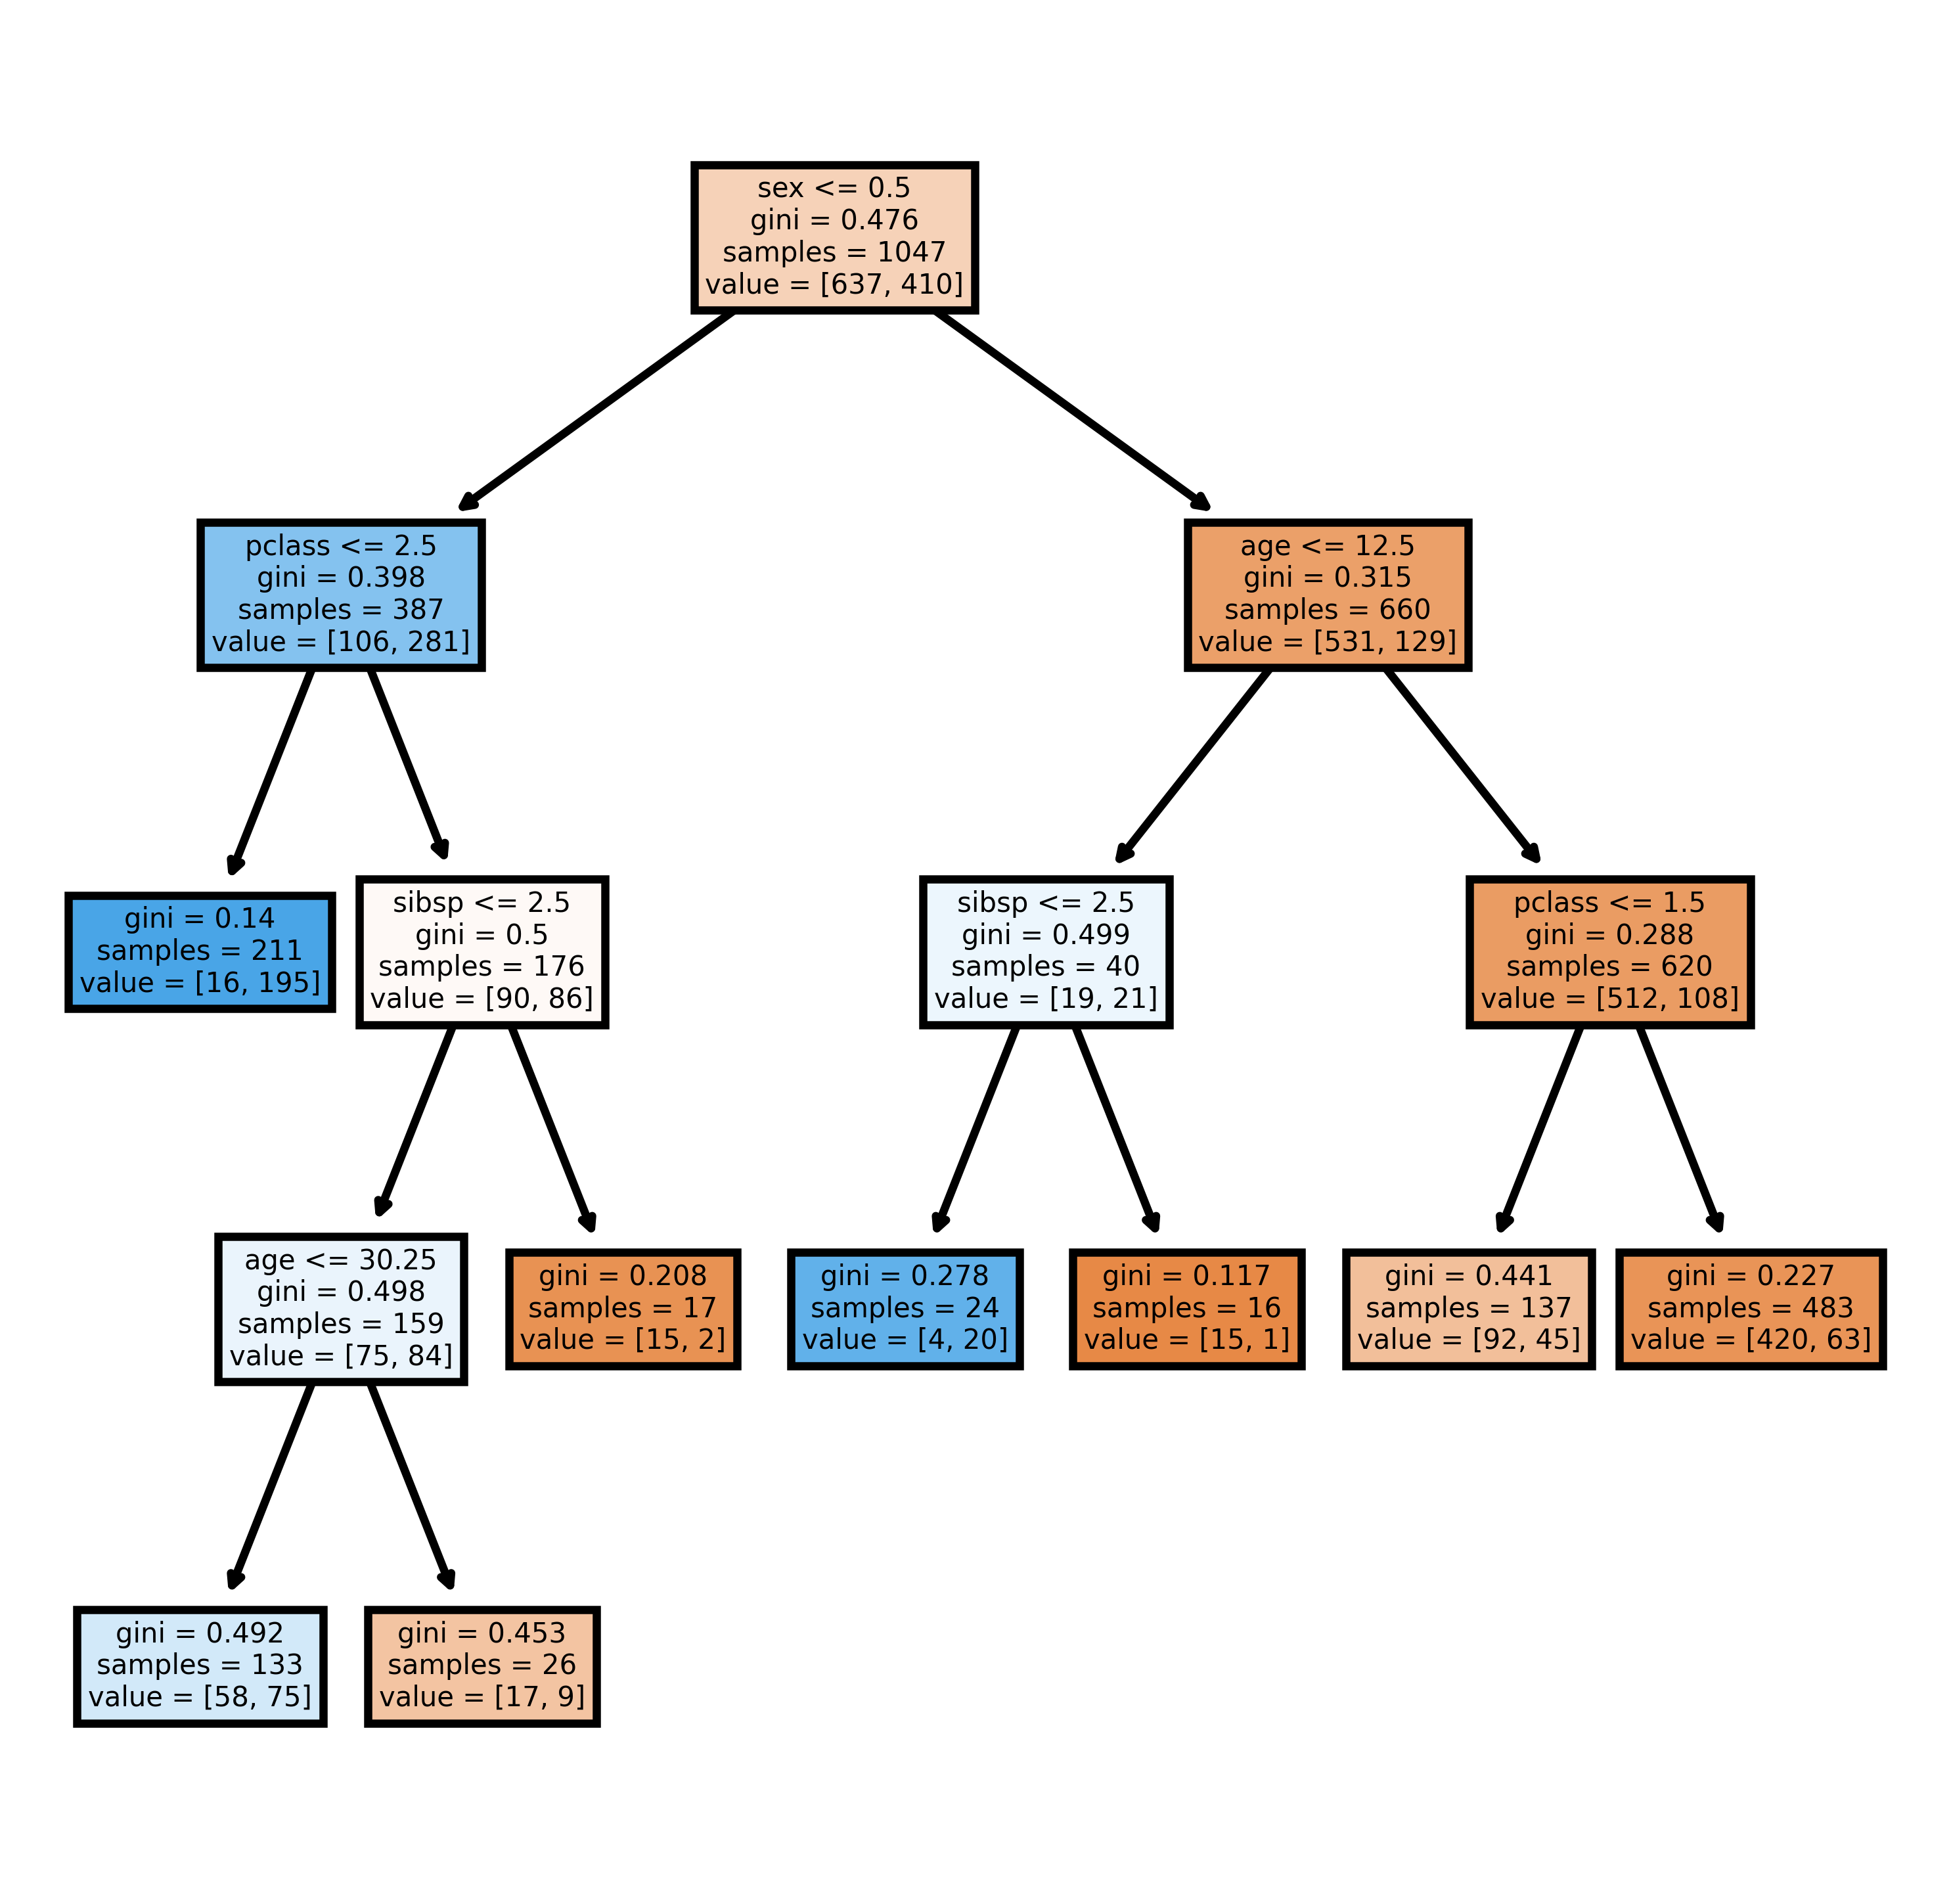

In [21]:
fig, axer = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 900)
plot_tree = tree.plot_tree(titanic_tree_max_leaf_nodes, feature_names = ["pclass","sex","age","sibsp"], filled = True)

Step 4: For the pruned tree, report its accuracy on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)

In [22]:
y_predict = titanic_tree_max_leaf_nodes.predict(X_test)


In [23]:
confusion_matrix(y_test, y_predict)

array([[155,  17],
       [ 30,  60]], dtype=int64)

In [24]:
surv = 60/90
fatal = 155/172
percentage1 = "{:.0%}".format(surv)
percentage2 = "{:.0%}".format(fatal)
print("survivors", percentage1)
print("fatalities", percentage2)
print(classification_report(y_test, y_predict))

survivors 67%
fatalities 90%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       172
           1       0.78      0.67      0.72        90

    accuracy                           0.82       262
   macro avg       0.81      0.78      0.79       262
weighted avg       0.82      0.82      0.82       262



Step 5: Use the RandomForestClassifier() function to train a random forest using the value of 
max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of 
random forest on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)
Check whether there is improvement as compared to a single tree obtained in Step 4

In [25]:
titanic_random_forest = RandomForestClassifier(n_estimators = 50,
                                               max_leaf_nodes = 8)
titanic_random_forest.fit(X, y)

RandomForestClassifier(max_leaf_nodes=8, n_estimators=50)

In [26]:
rf_prediction = titanic_random_forest.predict(X_test)
rf_num_survivors_prediction = np.sum((rf_prediction == 1) & (y_test == 1))
rf_num_survivors_actual = np.count_nonzero(y_test)

In [27]:
confusion_matrix(y_test, rf_prediction )


array([[155,  17],
       [ 29,  61]], dtype=int64)

In [28]:
surv = 58/90
fatal = 155/172
percentage1 = "{:.0%}".format(surv)
percentage2 = "{:.0%}".format(fatal)
print("survivors", percentage1)
print("fatalities", percentage2)
print(classification_report(y_test, y_predict))

survivors 64%
fatalities 90%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       172
           1       0.78      0.67      0.72        90

    accuracy                           0.82       262
   macro avg       0.81      0.78      0.79       262
weighted avg       0.82      0.82      0.82       262



percentage of survivors decreased in random forest classification compared to the decision tree. fatality percentage remains the same in both.
